In [1]:
game_list = [
    "Disco Elysium",
    "Lies of P",
    "Mafia III",
    "Total War: WARHAMMER III",
    "Resident Evil 3",
    "Phasmophobia",
    "Tom Clancy’s The Division 2",
    "The Witcher 3: Wild Hunt",
    "Fallout 76",
    "Cities: Skylines",
    "God of War: Ragnarok",
    "Just Cause 3",
    "Star Wars Jedi: Survivor",
    "Resident Evil Village",
    "Lightning Returns: Final Fantasy XIII",
    "Elden Ring",
    "Anno 2205",
    "Pay Day 2"
]

meta_scores = [91,80,68,86,77,76,82,92,52,85,94,74,85,84,66,96,72,79]

# [RPG/Story, Action, Shooting, Open World, Strategy, Horror]
pref_matrix = [
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,0.5,0.5,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
    [0,0,0,0,0,1],
    [0,0,0.5,0.5,0,0],
    [0,0.5,0,0.5,0,0],
    [0,0,0.5,0.5,0,0],
    [0,0,0,0,1,0],
    [0.5,0.5,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,0,0,0],
    [0,0,0,0,0,1],
    [0.5,0.5,0,0,0,0],
    [0,0.5,0,0.5,0,0],
    [0,0,0,0,1,0],
    [0,0,1,0,0,0]
]

In [2]:
import Aggregation.sampling as sp

game list loaded


In [3]:
def personal_scores_generation():
    prefrence = [sp.random_normal_distribution(0, 5) for _ in range(6)]
    personal_scores = dict()
    for i in range(18):
        score = meta_scores[i] + prefrence[0] * pref_matrix[i][0] + prefrence[1] * pref_matrix[i][1] + prefrence[2] * pref_matrix[i][2] + prefrence[3] * pref_matrix[i][3] + prefrence[4] * pref_matrix[i][4] + prefrence[5] * pref_matrix[i][5]
        personal_scores[game_list[i]] = min(round(score), 100)
    personal_scores["preference"] = prefrence
    return personal_scores

In [4]:
def ground_truth_order():
    prefrence = [0 for _ in range(6)]
    personal_scores = dict()
    for i in range(18):
        score = meta_scores[i] + prefrence[0] * pref_matrix[i][0] + prefrence[1] * pref_matrix[i][1] + prefrence[2] * pref_matrix[i][2] + prefrence[3] * pref_matrix[i][3] + prefrence[4] * pref_matrix[i][4] + prefrence[5] * pref_matrix[i][5]
        personal_scores[game_list[i]] = min(round(score), 100)
    return sorted(personal_scores, key=personal_scores.get, reverse=True)

In [5]:
def ranking_generation(personal_profile):
    temp = personal_profile.copy()
    temp.pop("preference")
    return sorted(temp, key=temp.get, reverse=True)

In [ ]:
# score of game Cities: Skylines and Star Wars Jedi: Survivor are same (index 9 and 12)
sp.index_convertion(ground_truth_order(), game_list)

[15, 10, 7, 0, 3, 9, 12, 13, 6, 1, 17, 4, 5, 11, 16, 2, 14, 8]

In [ ]:
profiles = []
for _ in range(100):
    profiles.append(personal_scores_generation())
rankings = []
idx_rankings = []
for i in range(100):
    rankings.append(ranking_generation(profiles[i]))
    idx_rankings.append(sp.index_convertion(rankings[i], game_list))

In [ ]:
# here uses some chinese as prompt as the LLM read chinese as instruction better
def promnt_generation(personal_scores):
    temp = personal_scores.copy()
    temp.pop("preference")
    prompt = "现在一个玩家对这十八个游戏的个人打分如下:\n"
    for title in temp.keys():
        prompt += title + ": " + str(temp[title]) + "\n"
    prompt += "请基于文档中对这些游戏的描述以及玩家的打分，用英文生成这位玩家对这18个游戏的评价。要求分数和评价正相关，优秀游戏的评价也需要多用褒义词。不应该出现低评分的评价反倒看着比高评价的好。如果文档中没有合适的消极观点或者积极观点也可以基于游戏类型和简介随机生成。每个评价在6-8句话之间。然后口吻请保持一致让人觉得是一个写的评价。"
    return prompt

In [60]:
print(promnt_generation(profiles[49]))

现在一个玩家对这十八个游戏的个人打分如下:
Disco Elysium: 91
Lies of P: 83
Mafia III: 65
Total War: WARHAMMER III: 94
Resident Evil 3: 78
Phasmophobia: 77
Tom Clancy’s The Division 2: 79
The Witcher 3: Wild Hunt: 92
Fallout 76: 49
Cities: Skylines: 93
God of War: Ragnarok: 96
Just Cause 3: 72
Star Wars Jedi: Survivor: 88
Resident Evil Village: 85
Lightning Returns: Final Fantasy XIII: 68
Elden Ring: 96
Anno 2205: 80
Pay Day 2: 75
请基于文档中对这些游戏的描述以及玩家的打分，用英文生成这位玩家对这18个游戏的评价。要求分数和评价正相关，优秀游戏的评价也需要多用褒义词。不应该出现低评分的评价反倒看着比高评价的好。如果文档中没有合适的消极观点或者积极观点也可以基于游戏类型和简介随机生成。每个评价在6-8句话之间。然后口吻请保持一致让人觉得是一个写的评价。


In [1]:
#--------------evaluation------------------

In [2]:
# record the scores
scores = [[96, 70, 65, 85, 77, 76, 79, 87, 49, 84, 92, 73, 75, 84, 64, 91, 71, 74],
 [99, 76, 68, 83, 73, 72, 82, 89, 52, 82, 96, 72, 81, 80, 68, 93, 69, 81],
 [82, 87, 69, 85, 71, 70, 83, 96, 53, 84, 93, 74, 92, 78, 65, 100, 71, 81],
 [98, 77, 65, 87, 72, 71, 79, 90, 49, 86, 96, 74, 82, 79, 68, 94, 73, 74],
 [84, 77, 68, 88, 79, 78, 82, 90, 52, 87, 89, 72, 82, 86, 61, 94, 74, 81],
 [88, 84, 70, 90, 75, 74, 84, 96, 54, 89, 94, 79, 89, 82, 66, 100, 76, 79],
 [86, 79, 68, 78, 73, 72, 82, 89, 52, 77, 91, 68, 84, 80, 63, 93, 64, 84],
 [88, 89, 70, 82, 81, 80, 84, 98, 54, 81, 97, 76, 94, 88, 69, 100, 68, 80],
 [94, 80, 65, 83, 70, 69, 79, 90, 49, 82, 95, 69, 85, 77, 67, 94, 69, 78],
 [99, 80, 63, 89, 82, 81, 77, 90, 47, 88, 98, 71, 85, 89, 70, 94, 75, 71],
 [94, 73, 65, 93, 80, 79, 79, 89, 49, 92, 92, 75, 78, 87, 64, 93, 79, 72],
 [85, 77, 73, 93, 84, 83, 87, 97, 57, 92, 90, 87, 82, 91, 62, 100, 79, 76],
 [87, 70, 71, 86, 74, 73, 85, 87, 55, 85, 87, 74, 75, 81, 59, 91, 72, 84],
 [92, 84, 64, 88, 82, 81, 78, 91, 48, 87, 96, 68, 89, 89, 68, 95, 74, 78],
 [87, 84, 65, 89, 72, 71, 79, 90, 49, 88, 94, 67, 89, 79, 66, 94, 75, 80],
 [98, 84, 66, 77, 77, 76, 80, 92, 50, 76, 99, 70, 89, 84, 71, 96, 63, 80],
 [98, 77, 67, 85, 81, 80, 81, 89, 51, 84, 96, 72, 82, 88, 68, 93, 71, 80],
 [99, 78, 65, 84, 76, 75, 79, 91, 49, 83, 97, 73, 83, 83, 69, 95, 70, 74],
 [88, 78, 60, 91, 71, 70, 74, 86, 44, 90, 91, 65, 83, 78, 63, 90, 77, 72],
 [83, 76, 70, 88, 79, 78, 84, 90, 54, 87, 88, 74, 81, 86, 60, 94, 74, 82],
 [91, 85, 70, 94, 74, 73, 84, 96, 54, 93, 96, 76, 90, 81, 68, 100, 80, 80],
 [87, 85, 74, 92, 83, 82, 88, 98, 58, 91, 95, 82, 90, 90, 67, 100, 78, 83],
 [88, 83, 67, 79, 80, 79, 81, 97, 51, 78, 94, 80, 88, 87, 66, 100, 65, 71],
 [78, 86, 66, 90, 85, 84, 80, 94, 50, 89, 91, 73, 91, 92, 63, 98, 76, 76],
 [98, 82, 68, 85, 78, 77, 82, 92, 52, 84, 98, 73, 87, 85, 70, 96, 71, 79],
 [95, 80, 71, 84, 76, 75, 85, 88, 55, 83, 96, 66, 85, 83, 68, 92, 70, 93],
 [91, 73, 77, 94, 77, 76, 91, 93, 61, 93, 90, 84, 78, 84, 62, 97, 80, 86],
 [92, 80, 69, 83, 76, 75, 83, 88, 53, 82, 95, 66, 85, 83, 67, 92, 69, 89],
 [88, 80, 67, 89, 76, 75, 81, 95, 51, 88, 93, 79, 85, 83, 65, 99, 75, 71],
 [88, 82, 66, 86, 76, 75, 80, 95, 50, 85, 94, 77, 87, 83, 66, 99, 72, 72],
 [93, 85, 70, 81, 83, 82, 84, 95, 54, 80, 97, 76, 90, 90, 69, 99, 67, 81],
 [88, 81, 68, 89, 79, 78, 82, 93, 52, 88, 93, 75, 86, 86, 65, 97, 75, 79],
 [89, 77, 68, 96, 74, 73, 82, 90, 52, 95, 92, 72, 82, 81, 64, 94, 82, 80],
 [97, 83, 69, 90, 75, 74, 83, 94, 53, 89, 98, 75, 88, 82, 70, 98, 76, 80],
 [91, 79, 72, 88, 81, 80, 86, 95, 56, 87, 94, 80, 84, 88, 66, 99, 74, 81],
 [91, 80, 62, 91, 75, 74, 76, 86, 46, 90, 94, 62, 85, 82, 66, 90, 77, 80],
 [86, 75, 69, 85, 82, 81, 83, 94, 53, 84, 89, 82, 80, 89, 61, 98, 71, 72],
 [97, 78, 70, 81, 75, 74, 84, 95, 54, 80, 96, 82, 83, 82, 68, 99, 67, 75],
 [91, 78, 65, 86, 80, 79, 79, 89, 49, 85, 93, 70, 83, 87, 65, 93, 72, 77],
 [90, 82, 66, 91, 73, 72, 80, 91, 50, 90, 95, 69, 87, 80, 67, 95, 77, 80],
 [92, 79, 72, 83, 72, 71, 86, 92, 56, 82, 94, 75, 84, 79, 66, 96, 69, 86],
 [92, 77, 66, 90, 75, 74, 80, 91, 50, 89, 93, 74, 82, 82, 65, 95, 76, 74],
 [99, 80, 71, 83, 76, 75, 85, 93, 55, 82, 98, 76, 85, 83, 70, 97, 69, 83],
 [96, 81, 68, 90, 82, 81, 82, 94, 52, 89, 97, 78, 86, 89, 69, 98, 76, 74],
 [93, 80, 69, 84, 71, 70, 83, 90, 53, 83, 95, 70, 85, 78, 67, 94, 70, 85],
 [98, 74, 62, 95, 68, 67, 76, 82, 46, 94, 95, 60, 79, 75, 67, 86, 81, 81],
 [92, 90, 69, 87, 71, 70, 83, 96, 53, 86, 99, 72, 95, 78, 71, 100, 73, 82],
 [91, 79, 68, 86, 78, 77, 82, 91, 52, 85, 94, 72, 84, 85, 66, 95, 72, 81],
 [98, 81, 66, 88, 84, 83, 80, 91, 50, 87, 98, 72, 86, 91, 70, 95, 74, 76],
 [91, 83, 65, 94, 78, 77, 79, 92, 49, 93, 96, 72, 88, 85, 68, 96, 80, 75]]

In [3]:
# copied from the unsloth llama3 workspace, which is the profile infered by finetuned llama-3-8b-instruct
profile_llama3 = [[0, 7, 10, 3, 15, 9, 5, 13, 4, 2, 6, 11, 1, 12, 17, 16, 14, 8],
 [0, 7, 10, 15, 1, 3, 6, 9, 12, 13, 2, 5, 4, 17, 11, 16, 14, 8],
 [0, 7, 10, 1, 12, 15, 3, 9, 6, 13, 4, 2, 5, 17, 11, 16, 14, 8],
 [0, 7, 10, 3, 1, 12, 15, 9, 6, 4, 13, 11, 5, 17, 2, 16, 14, 8],
 [0, 7, 3, 10, 15, 1, 9, 12, 4, 5, 6, 13, 2, 17, 11, 16, 14, 8],
 [0, 7, 10, 15, 1, 12, 3, 9, 4, 6, 11, 13, 5, 2, 17, 16, 14, 8],
 [0, 7, 10, 1, 15, 12, 3, 6, 9, 13, 4, 5, 11, 17, 2, 16, 14, 8],
 [0, 7, 1, 10, 12, 15, 3, 4, 6, 13, 5, 9, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 15, 1, 12, 3, 9, 13, 11, 17, 6, 2, 4, 5, 16, 8, 14],
 [0, 7, 10, 15, 3, 13, 1, 4, 12, 9, 5, 11, 2, 17, 6, 16, 14, 8],
 [0, 7, 3, 9, 10, 13, 15, 4, 5, 11, 17, 6, 1, 12, 16, 2, 14, 8],
 [0, 7, 10, 15, 3, 1, 4, 9, 12, 13, 6, 2, 5, 11, 17, 16, 14, 8],
 [0, 7, 10, 15, 3, 6, 9, 13, 12, 17, 4, 2, 5, 11, 1, 14, 16, 8],
 [0, 7, 10, 12, 3, 1, 13, 15, 9, 4, 5, 6, 2, 11, 17, 16, 14, 8],
 [0, 7, 10, 15, 9, 1, 3, 12, 4, 13, 5, 6, 17, 2, 11, 14, 16, 8],
 [0, 10, 7, 12, 1, 15, 13, 4, 6, 3, 5, 9, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 3, 4, 13, 15, 1, 12, 9, 6, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 15, 1, 12, 3, 9, 13, 4, 5, 11, 6, 17, 2, 16, 14, 8],
 [0, 7, 3, 10, 9, 15, 12, 1, 13, 4, 5, 17, 6, 11, 16, 14, 2, 8],
 [0, 7, 3, 10, 4, 6, 15, 9, 13, 12, 1, 2, 5, 17, 11, 16, 14, 8],
 [0, 7, 10, 15, 3, 1, 6, 12, 9, 13, 4, 5, 2, 11, 17, 16, 14, 8],
 [0, 7, 10, 15, 1, 3, 9, 12, 4, 6, 5, 13, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 12, 15, 13, 1, 3, 4, 5, 9, 6, 11, 17, 16, 14, 2, 8],
 [7, 0, 1, 15, 3, 5, 10, 9, 12, 4, 13, 6, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 1, 12, 3, 15, 4, 9, 13, 5, 6, 11, 17, 2, 16, 14, 8],
 [0, 10, 7, 12, 3, 1, 15, 9, 13, 5, 6, 4, 17, 2, 11, 16, 14, 8],
 [0, 7, 3, 10, 9, 6, 15, 11, 13, 4, 5, 2, 12, 17, 16, 14, 1, 8],
 [0, 7, 10, 3, 15, 12, 1, 13, 6, 9, 4, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 12, 15, 3, 9, 1, 13, 4, 6, 11, 5, 2, 17, 16, 14, 8],
 [0, 7, 10, 15, 1, 3, 12, 9, 4, 6, 13, 5, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 12, 1, 15, 13, 3, 4, 5, 9, 6, 2, 11, 17, 16, 14, 8],
 [0, 7, 3, 10, 12, 1, 15, 9, 4, 13, 5, 6, 11, 2, 17, 16, 14, 8],
 [0, 3, 7, 9, 10, 15, 6, 12, 13, 1, 4, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 1, 12, 3, 15, 9, 6, 13, 4, 5, 11, 2, 17, 16, 14, 8],
 [0, 7, 10, 1, 3, 12, 15, 9, 4, 6, 13, 5, 11, 2, 17, 16, 14, 8],
 [0, 7, 10, 9, 1, 12, 3, 15, 13, 4, 5, 6, 17, 11, 16, 14, 2, 8],
 [0, 7, 10, 3, 15, 4, 5, 13, 9, 12, 6, 1, 11, 2, 17, 16, 14, 8],
 [0, 7, 10, 15, 6, 3, 9, 11, 12, 13, 1, 4, 5, 17, 2, 16, 14, 8],
 [0, 7, 10, 3, 9, 15, 4, 12, 13, 5, 6, 1, 11, 17, 2, 16, 14, 8],
 [0, 10, 7, 1, 12, 15, 3, 9, 4, 6, 13, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 3, 15, 6, 1, 12, 9, 13, 11, 5, 17, 2, 4, 16, 14, 8],
 [0, 7, 10, 3, 9, 15, 12, 13, 1, 4, 6, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 15, 3, 1, 12, 6, 9, 13, 4, 2, 17, 5, 11, 16, 14, 8],
 [0, 7, 10, 3, 12, 15, 9, 13, 5, 1, 4, 6, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 15, 12, 1, 3, 9, 13, 6, 5, 17, 4, 2, 11, 16, 14, 8],
 [0, 3, 10, 7, 9, 15, 12, 17, 6, 13, 1, 5, 16, 11, 4, 2, 14, 8],
 [0, 7, 10, 1, 15, 3, 9, 12, 6, 13, 4, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 3, 9, 15, 12, 1, 13, 6, 4, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 3, 4, 12, 13, 15, 1, 9, 5, 6, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 9, 1, 12, 15, 3, 13, 4, 5, 6, 2, 17, 11, 16, 14, 8]]

In [4]:
import Aggregation.sampling as sp

schedule = []
for _ in range(10):
    schedule.append((0.6, 1.5))
for _ in range(10):
    schedule.append((0.4, 1.0))
for _ in range(10):
    schedule.append((0.2, 0.6))
for _ in range(10):
    schedule.append((0.15, 0.4))
for _ in range(10):
    schedule.append((0.1, 0.2))

log = sp.theta_estimation(profile_llama3, alternative_number=18, iteration=50, sampling_rate=1000, keep_rate=100, resampling_schedule=schedule)

game list loaded
iteration 0: average likelihood (log_value) is   -0.8359456014220863
iteration 1: average likelihood (log_value) is   -0.5896470578195809
iteration 2: average likelihood (log_value) is   -0.5832465438322203
iteration 3: average likelihood (log_value) is   -0.5768852788256851
iteration 4: average likelihood (log_value) is   -0.5720741537759461
iteration 5: average likelihood (log_value) is   -0.5682493405747011
iteration 6: average likelihood (log_value) is   -0.567375522369706
iteration 7: average likelihood (log_value) is   -0.5627974138657369
iteration 8: average likelihood (log_value) is   -0.5606435566168589
iteration 9: average likelihood (log_value) is   -0.5591779608763799
iteration 10: average likelihood (log_value) is   -0.5557072730151502
iteration 11: average likelihood (log_value) is   -0.38957169102065914
iteration 12: average likelihood (log_value) is   -0.384399842783199
iteration 13: average likelihood (log_value) is   -0.37672583199133064
iteration 14:

In [5]:
log[49]

{'iteration': 49,
 'average_log_likelihood': 0.05188375167761785,
 'zeta_estimation': array([[-3.66567651e-02,  6.70421855e-03, -2.12502306e-02,
         -4.26489330e-02, -2.19275620e-03, -9.28448433e-03,
          1.61888491e-02, -1.05585219e-02,  3.78550262e-02,
          4.38140881e-02,  1.64217853e-02, -5.81275295e-02,
          2.42921721e-02, -8.39235177e-04,  1.08995031e-02,
         -5.94733407e-03,  1.15995491e-02,  1.45770871e-02],
        [-3.68065319e-02,  1.67990547e-03, -2.51863145e-02,
         -4.35689277e-02,  1.01436106e-03, -2.66480118e-03,
          2.52985455e-02,  5.47977459e-04,  2.32653324e-02,
          4.51521527e-02,  4.06720368e-03, -4.09521741e-02,
          2.15288290e-02,  2.12253229e-03,  1.05510106e-02,
         -8.58724422e-03,  1.45604236e-02,  2.40628642e-02],
        [-3.79195506e-02,  9.28904585e-03, -1.91203425e-02,
         -3.58894696e-02, -7.13081452e-03, -7.25986715e-03,
          3.47403952e-02, -6.11151332e-03,  3.03672815e-02,
          1.8

In [6]:
# Truth [15, 10, 7, 0, 3, 9, 12, 13, 6, 1, 17, 4, 5, 11, 16, 2, 14, 8]
sp.order_generation(log[49]["theta_estimation"].tolist())

[0, 7, 10, 3, 15, 12, 1, 9, 13, 4, 6, 5, 11, 17, 2, 16, 14, 8]

In [7]:
def utility_calculation(scores, rankings, decay_rate = 0.8):
    total_score = 0.0
    for i in range(len(scores)):
        score = scores[i]
        order = rankings[i]
        total_score += sum([score[order[j]] * decay_rate ** j for j in range(len(score))])
    return total_score

def average_utility(scores, rankings, decay_rate = 0.8):
    return utility_calculation(scores, rankings, decay_rate)/len(scores)

In [8]:
global_ranking = [sp.order_generation(log[49]["theta_estimation"].tolist()) for _ in range(50)]
soc_util = utility_calculation(scores=scores, rankings=global_ranking)
avg_util = soc_util/50.0
print(f"RUMSA Global Ranking List\nSocial Utility: {soc_util}\nAverage Utility: {avg_util}")

RUMSA Global Ranking List
Social Utility: 21676.885387357124
Average Utility: 433.53770774714246


In [9]:
# copied from CAPRA.ipynb which is the global ranking based on CAPRA algorithm from the Twitter-roBERTa-base workspace
CAPRA_ranking = [[0, 1, 15, 10, 7, 5, 3, 9, 12, 6, 17, 4, 13, 11, 2, 16, 8, 14] for _ in range(50)]

In [10]:
capra_soc_util = utility_calculation(scores=scores, rankings=CAPRA_ranking)
capra_avg_util = capra_soc_util/50.0
print(f"CAPRA Ranking List\nSocial Utility: {capra_soc_util}\nAverage Utility: {capra_avg_util}")

CAPRA Ranking List
Social Utility: 21344.29940149669
Average Utility: 426.8859880299338


In [11]:
# test the utility when ranking list is randomly generated
import random
import numpy as np

random_soc_utils = []
for _ in range(100):
    random_ranking = [random.sample(range(18), 18) for _ in range(50)]
    random_soc_utils.append(utility_calculation(scores=scores, rankings=random_ranking))

temp = np.array(random_soc_utils)
random_soc_util = np.mean(temp)
random_avg_util = random_soc_util/50.0
print(f"Random Ranking List\nSocial Utility: {random_soc_util}\nAverage Utility: {random_avg_util}")

Random Ranking List
Social Utility: 19650.23817423365
Average Utility: 393.00476348467305


In [12]:
# tests of voting rules in compsoc
import compsoc.voter_model as vmodel
import compsoc.evaluate as eval
import compsoc.voting_rules as rules
from compsoc.profile import Profile

# function to transfer profile into compsoc format
def prof_list_to_tuple(profile):
    temp = []
    for p in profile:
        temp.append(tuple(p))
    dic = dict()
    for t in temp:
        if t not in dic.keys():
            dic[t] = 1
        else:
            dic[t] += 1
    result = []
    for k in dic.keys():
        result.append((dic[k], k))
    return result

# and transfer back
def prof_tuple_to_list(profile):
    result = []
    for i in profile:
        for j in range(i[0]):
            result.append(list(i[1]))
    random.shuffle(result)
    return result

test_rules = {
    "Borda": rules.borda.borda_rule,
    "Borda_gamma_0.01": rules.borda_gamma.get_borda_gamma(0.01),
    "Borda_gamma_0.25": rules.borda_gamma.get_borda_gamma(0.25),
    "Borda_gamma_0.5": rules.borda_gamma.get_borda_gamma(0.5),
    "Borda_gamma_0.75": rules.borda_gamma.get_borda_gamma(0.75),
    "Borda_gamma_0.99": rules.borda_gamma.get_borda_gamma(0.99),
    "Borda_gamma_1.00": rules.borda_gamma.get_borda_gamma(1.0),
    "Copeland": rules.copeland.copeland_rule,
    "Dowdall": rules.dowdall.dowdall_rule,
    "Simpson": rules.simpson.simpson_rule,
}

In [13]:
compsoc_profile = Profile(prof_list_to_tuple(profile_llama3))

In [14]:
compsoc_rule_utilities = dict()
for rule in test_rules.keys():
    ranking = compsoc_profile.ranking(test_rules[rule])
    # transfer to list format
    ranking = [i for (i, _) in ranking]
    rankings = [ranking for _ in range(50)]
    temp_su = utility_calculation(scores=scores, rankings=rankings)
    temp_au = temp_su/50.0
    compsoc_rule_utilities[rule] = (temp_su, temp_au)
print(compsoc_rule_utilities)

{'Borda': (21676.885387357124, 433.53770774714246), 'Borda_gamma_0.01': (21581.795403869128, 431.63590807738257), 'Borda_gamma_0.25': (21581.795403869128, 431.63590807738257), 'Borda_gamma_0.5': (21648.757336157134, 432.9751467231427), 'Borda_gamma_0.75': (21660.501387357126, 433.21002774714253), 'Borda_gamma_0.99': (21676.885387357124, 433.53770774714246), 'Borda_gamma_1.00': (19884.821031119696, 397.69642062239393), 'Copeland': (21660.501387357126, 433.21002774714253), 'Dowdall': (21660.501387357126, 433.21002774714253), 'Simpson': (20295.456551119692, 405.90913102239386)}


In [15]:
# generate personalized rankings
zeta_estimation = log[49]['zeta_estimation'].tolist()
theta_estimation = log[49]['theta_estimation'].tolist()

In [16]:
def personalized_ranking_generation(theta, zeta, zeta_amp=1.0):
    num_voter = len(zeta)
    rankings = []
    np_theta = np.array(theta)
    np_zeta = np.array(zeta)
    for i in range(num_voter):
        personal_utils = np_theta + (np_zeta[i] * zeta_amp)
        personal_utils = personal_utils.tolist()
        rankings.append(sp.order_generation(personal_utils))
    return rankings

In [17]:
personalized_ranking = personalized_ranking_generation(theta_estimation, zeta_estimation)
per_soc_util = utility_calculation(scores=scores, rankings=personalized_ranking)
per_avg_util = per_soc_util/50.0
print(f"RUMSA Personalized Ranking List\nSocial Utility: {per_soc_util}\nAverage Utility: {per_avg_util}")

RUMSA Personalized Ranking List
Social Utility: 21700.332536572874
Average Utility: 434.0066507314575


/var/folders/s8/xfq8jzxs3kq8wp023sbjj8m00000gn/T/ipykernel_6596/3723107600.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation='vertical', ha='center')


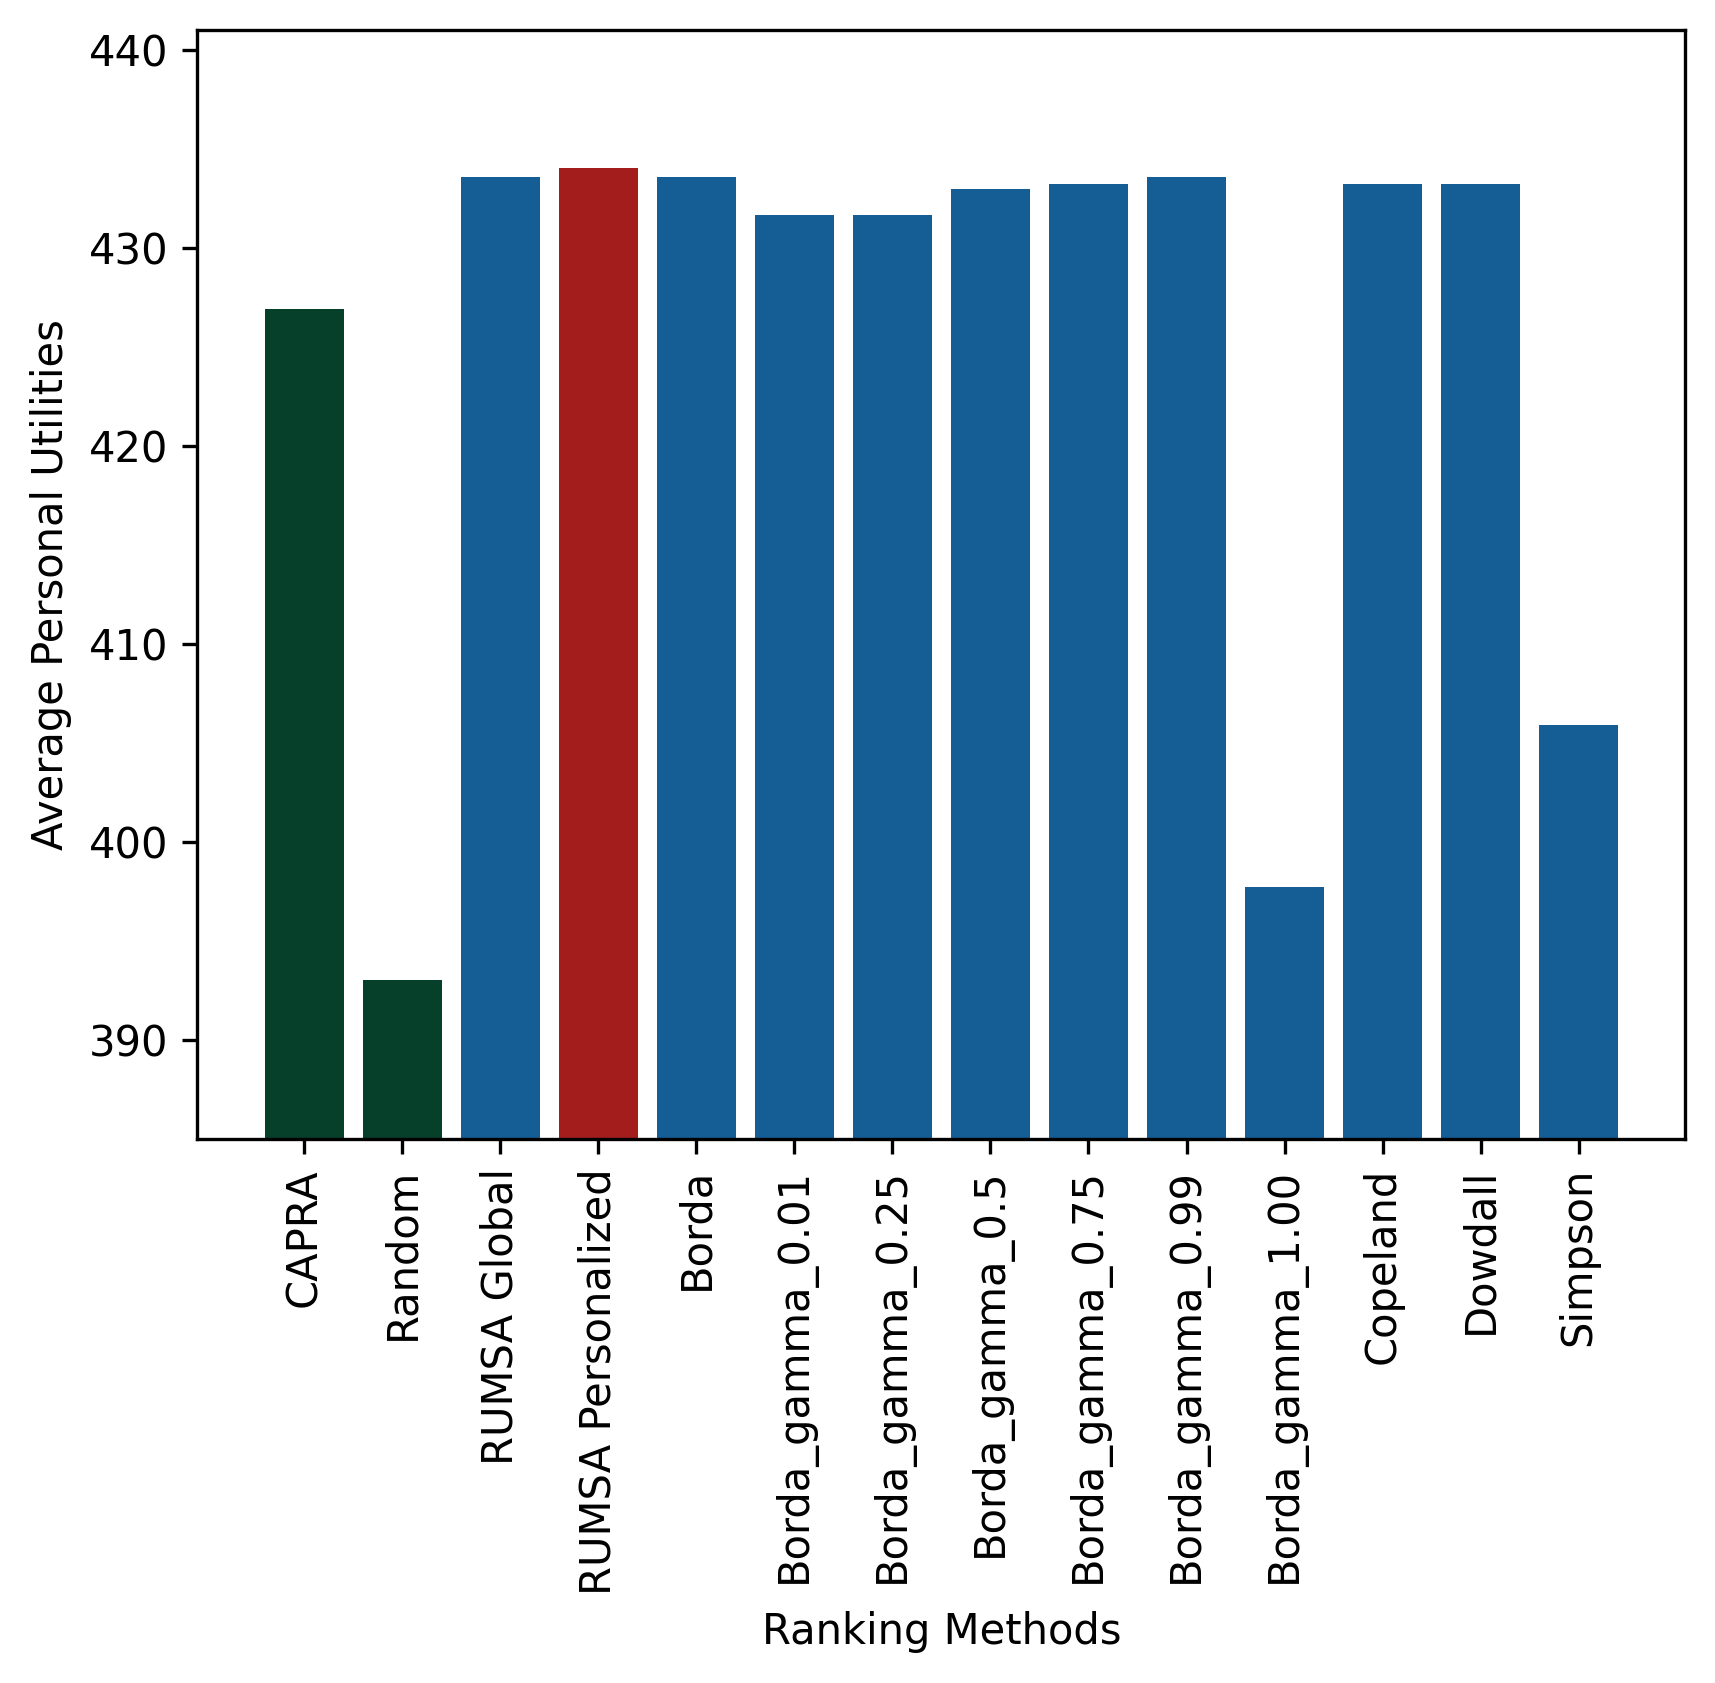

In [21]:
#draw the result
import matplotlib.pyplot as plt

average_utilities = [capra_avg_util, random_avg_util, avg_util, per_avg_util]
labels = ["CAPRA", "Random", "RUMSA Global", "RUMSA Personalized"]

colors = ['#06402b','#06402b','#155E95','#A31D1D','#155E95','#155E95','#155E95','#155E95','#155E95','#155E95','#155E95','#155E95','#155E95','#155E95']

for rule in test_rules.keys():
    average_utilities.append(compsoc_rule_utilities[rule][1])
    labels.append(rule)

fig, ax = plt.subplots()

fig.set_dpi(300)

ax.bar(labels, average_utilities, color=colors)

ax.set_xticklabels(labels, rotation='vertical', ha='center')

ax.set_xlabel('Ranking Methods')

ax.set_ylabel('Average Personal Utilities')

min_y = min(average_utilities)
ax.set_ylim(385, 441)

plt.show()
